# Introdução com Keras

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Bibliotecas básicas

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

### Carregando o dataset

In [3]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Exploração dos dados

In [4]:
print(f'Shape treino: {imagens_treino.shape}')
print(f'Shape teste: {imagens_teste.shape}')

Shape treino: (60000, 28, 28)
Shape teste: (10000, 28, 28)


### Exibição dos dados

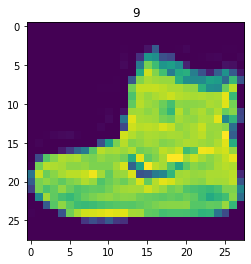

In [5]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
plt.show()

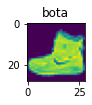

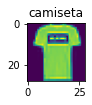

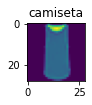

In [6]:
total_labels = 10
nome_classificacoes = ['camiseta', 'calça', 'pullover', 'vestido', 'casaco', 'sandália', 'camisa', 'tênis', 'bolsa', 'bota']


for imagem in range(3):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nome_classificacoes[identificacoes_treino[imagem]])
  plt.show()  

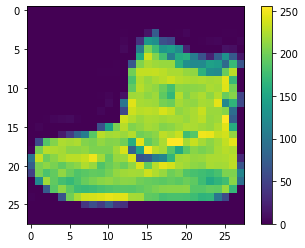

In [7]:
plt.imshow(imagens_treino[0])
plt.colorbar()
plt.show()

### Criando o modelo


     modelo sequencia
                        entrada
                        processamento
                        saída

In [8]:
imagens_treino_normalizado = imagens_treino/255.0

In [9]:
modelo = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(total_labels, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
historico = modelo.fit(imagens_treino_normalizado, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6680 - accuracy: 0.7657 - val_loss: 0.4009 - val_accuracy: 0.8534
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4007 - accuracy: 0.8533 - val_loss: 0.3733 - val_accuracy: 0.8637
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3609 - accuracy: 0.8674 - val_loss: 0.3413 - val_accuracy: 0.8737
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3381 - accuracy: 0.8745 - val_loss: 0.3618 - val_accuracy: 0.8716
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3268 - accuracy: 0.8778 - val_loss: 0.3333 - val_accuracy: 0.8800


### Avaliando o modelo

In [10]:
testes = modelo.predict(imagens_teste)
print(f'Predito: {np.argmax(testes[0])}')
print(f'Real: {identificacoes_teste[0]}')

Predito: 9
Real: 9


In [11]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f'Perda: {perda_teste} | Acurácia: {acuracia_teste}')

313/313 [==============================] - 1s 2ms/step - loss: 64.7461 - accuracy: 0.8435
Perda: 64.74605560302734 | Acurácia: 0.843500018119812


### Visualização das acurácias de treino e validação por época

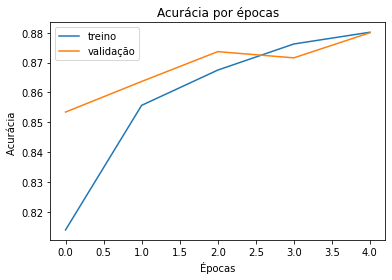

In [12]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia ')
plt.legend(['treino', 'validação'])
plt.show()

### Visualização das perdas de treino e validação por época

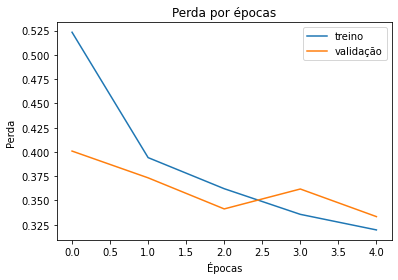

In [13]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda ')
plt.legend(['treino', 'validação'])
plt.show()

### Salvando o modelo

In [14]:
modelo.save('/content/drive/MyDrive/Colab Notebooks/Alura/modelo.h5')

### Carregando o modelo

In [15]:
from tensorflow.keras.models import load_model
modelo_salvo = load_model('/content/drive/MyDrive/Colab Notebooks/Alura/modelo.h5')

### Predição

In [16]:
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'Predito: {np.argmax(testes_modelo_salvo[0])}')

Predito: 9


# Parte 2

### Resumo do modelo

In [17]:
sumario_do_modelo = modelo.summary()
sumario_do_modelo

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### Pesos da camada 1

In [18]:
pesos_dense_1 = modelo.layers[1].get_weights()[0]
pesos_dense_1

array([[ 0.01519953,  0.11568935,  0.08892066, ..., -0.06913323,
         0.0401973 ,  0.09114003],
       [ 0.07106897,  0.14577639,  0.07046062, ...,  0.15334687,
        -0.0314687 , -0.10993246],
       [ 0.04782451,  0.01810697,  0.14322652, ...,  0.12368397,
         0.2201045 ,  0.00869454],
       ...,
       [ 0.00028178, -0.00176006,  0.10957786, ...,  0.11013521,
         0.02024928,  0.18716963],
       [-0.05186709,  0.05147966,  0.08111993, ..., -0.00341082,
         0.09682578,  0.19518194],
       [-0.03952584,  0.1196895 ,  0.21911433, ..., -0.07522653,
        -0.05763699,  0.00584758]], dtype=float32)

In [19]:
pesos_dense_1.shape

(784, 256)

### Vieses da camada 1

In [20]:
vieses_dense_1 = modelo.layers[1].get_weights()[1] #viés mede a distância da classe correta
vieses_dense_1[:10]

array([-0.01121824,  0.11845768,  0.26981476,  0.04976383,  0.18305875,
        0.20687124,  0.04569679,  0.1547543 ,  0.07801217,  0.1168787 ],
      dtype=float32)

In [21]:
vieses_dense_1.shape

(256,)

### Zerando os pesos

In [22]:
pesos_dense_1_zerados = np.zeros(pesos_dense_1.shape)
print(pesos_dense_1_zerados.shape)
pesos_dense_1_zerados

(784, 256)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
modelo.layers[1].set_weights([pesos_dense_1_zerados, vieses_dense_1])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
historico = modelo.fit(imagens_treino_normalizado, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7166 - accuracy: 0.7459 - val_loss: 0.4069 - val_accuracy: 0.8482
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4108 - accuracy: 0.8513 - val_loss: 0.3945 - val_accuracy: 0.8541
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3693 - accuracy: 0.8634 - val_loss: 0.3602 - val_accuracy: 0.8665
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3518 - accuracy: 0.8716 - val_loss: 0.3543 - val_accuracy: 0.8698
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3309 - accuracy: 0.8776 - val_loss: 0.3482 - val_accuracy: 0.8777


### Visualizando as acurácias e perdas

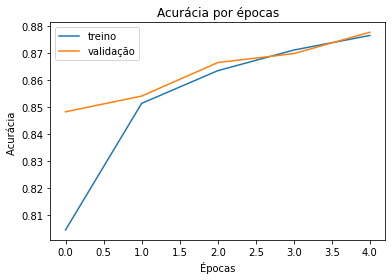

In [24]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia ')
plt.legend(['treino', 'validação'])
plt.show()

### Deixando os pesos aleatórios

In [26]:
pesos_dense_1_aleatorios = np.random.rand(784, 256)
print(pesos_dense_1_aleatorios.shape)
pesos_dense_1_aleatorios

(784, 256)


array([[0.08102961, 0.96480308, 0.3809674 , ..., 0.80400887, 0.91346757,
        0.57701637],
       [0.48949974, 0.45900964, 0.98189552, ..., 0.10525204, 0.81210352,
        0.36795437],
       [0.39613363, 0.9864573 , 0.3201272 , ..., 0.21769823, 0.26016105,
        0.91513366],
       ...,
       [0.31026037, 0.68362949, 0.71920411, ..., 0.41648477, 0.73286635,
        0.59522075],
       [0.42198174, 0.78864758, 0.19584477, ..., 0.27653422, 0.55154908,
        0.12895186],
       [0.4173237 , 0.08815273, 0.23245478, ..., 0.70515156, 0.09925047,
        0.1850739 ]])

In [27]:
modelo.layers[1].set_weights([pesos_dense_1_aleatorios, vieses_dense_1])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
historico = modelo.fit(imagens_treino_normalizado, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 259.9668 - accuracy: 0.2847 - val_loss: 16.8947 - val_accuracy: 0.7196
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 39.3421 - accuracy: 0.6026 - val_loss: 9.5862 - val_accuracy: 0.7676
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 18.2333 - accuracy: 0.6782 - val_loss: 8.2455 - val_accuracy: 0.7053
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 9.2454 - accuracy: 0.7189 - val_loss: 3.5558 - val_accuracy: 0.8107
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 4.7760 - accuracy: 0.7469 - val_loss: 2.5015 - val_accuracy: 0.8115


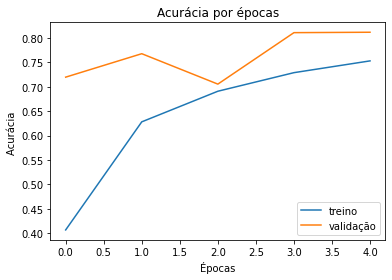

In [28]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia ')
plt.legend(['treino', 'validação'])
plt.show()

### Configuração do modelo

In [30]:
modelo.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None

### Viéses zerados com pesos zerados

In [31]:
vieses_dense_1_zerados = np.zeros((256,))
print(vieses_dense_1_zerados.shape)
vieses_dense_1_zerados

(256,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
modelo.layers[1].set_weights([pesos_dense_1_zerados, vieses_dense_1_zerados])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
historico = modelo.fit(imagens_treino_normalizado, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.5084 - accuracy: 0.1014 - val_loss: 2.3257 - val_accuracy: 0.0995
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3143 - accuracy: 0.0985 - val_loss: 2.3032 - val_accuracy: 0.0995
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3030 - accuracy: 0.0992 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3025 - accuracy: 0.1023 - val_loss: 2.3027 - val_accuracy: 0.1003
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.0983


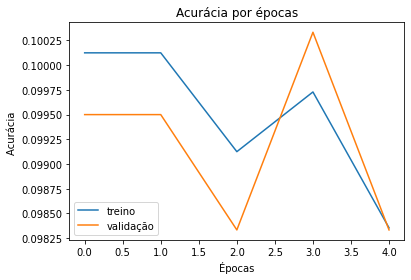

In [33]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia ')
plt.legend(['treino', 'validação'])
plt.show()

### Viéses zerados com pesos aleatórios

In [34]:
modelo.layers[1].set_weights([pesos_dense_1_aleatorios, vieses_dense_1_zerados])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
historico = modelo.fit(imagens_treino_normalizado, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 71.2183 - accuracy: 0.2935 - val_loss: 7.9916 - val_accuracy: 0.6288
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 13.0792 - accuracy: 0.5618 - val_loss: 4.6992 - val_accuracy: 0.6983
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 7.1886 - accuracy: 0.6312 - val_loss: 3.0457 - val_accuracy: 0.7162
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 4.2829 - accuracy: 0.6784 - val_loss: 2.1282 - val_accuracy: 0.7476
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.6608 - accuracy: 0.7026 - val_loss: 2.2238 - val_accuracy: 0.7207


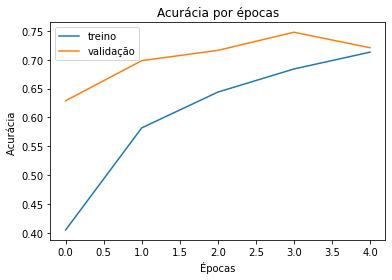

In [35]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia ')
plt.legend(['treino', 'validação'])
plt.show()

### Otimazadores

In [37]:
adam = keras.optimizers.Adam(lr=0.5)
modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics='accuracy')
historico = modelo.fit(imagens_treino_normalizado, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 61.4150 - accuracy: 0.1089 - val_loss: 2.3582 - val_accuracy: 0.0995
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3589 - accuracy: 0.0994 - val_loss: 2.3742 - val_accuracy: 0.0995
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3576 - accuracy: 0.0979 - val_loss: 2.3361 - val_accuracy: 0.0983
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 2.3669 - accuracy: 0.1013 - val_loss: 2.3509 - val_accuracy: 0.1030
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3584 - accuracy: 0.1006 - val_loss: 2.3828 - val_accuracy: 0.1013


In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia ')
plt.legend(['treino', 'validação'])
plt.show()